In [87]:
import torch
import math
import matplotlib.pyplot as plt
import numpy as np

In [88]:
X = torch.linspace(-math.pi, math.pi, 2000)
y= torch.cos(X)


In [89]:
# split = int(0.8*len(X))
# train_X, test_X = X[:split], X[split:]
# train_y, test_y = y[:split], y[split:]

In [90]:
p = torch.tensor([1, 2, 3])
xx =X.unsqueeze(-1).pow(p)
# XX = test_X.unsqueeze(-1).pow(p)

In [91]:
model = torch.nn.Sequential(torch.nn.Linear(3,1),torch.nn.Flatten(0,1))

In [92]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [93]:
learning_rate= 1e-4
optimiser  = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

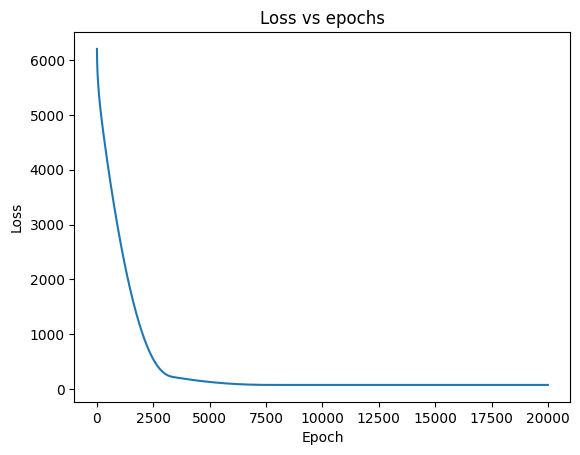

In [94]:
epochs = 20000
losses = []
for epoch in range(epochs):
  y_preds = model(xx)
  loss= loss_fn(y_preds.squeeze(),y)
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()
  losses.append(loss.item())
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs epochs")
plt.show()


In [95]:
model.state_dict()


OrderedDict([('0.weight', tensor([[-4.9999e-05, -2.3084e-01, -4.9999e-05]])),
             ('0.bias', tensor([0.7595]))])

In [96]:
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

Result: y = 0.7594690918922424 + -4.999944940209389e-05 x + -0.23083719611167908 x^2 + -4.99994057463482e-05 x^3


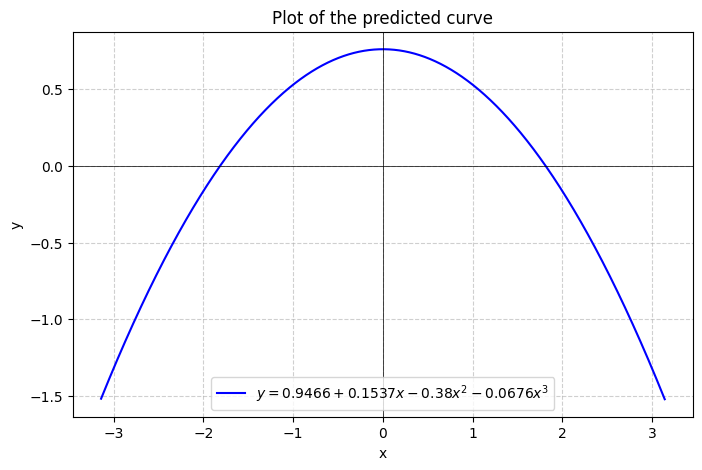

In [97]:
a0 = linear_layer.bias.item()
a1 = linear_layer.weight[:, 0].item()
a2 = linear_layer.weight[:, 1].item()
a3 = linear_layer.weight[:, 2].item()
x = np.linspace(-math.pi, math.pi, 2000)

y = a0 + a1*x + a2*x**2 + a3*x**3

plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'$y = 0.9466 + 0.1537x - 0.38x^2 - 0.0676x^3$', color='b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of the predicted curve")
plt.legend()
plt.show()